# Librerías

In [1]:
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#Data viz
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [6]:
from eda import valores_unicos

# Lectura

In [2]:
df = pd.read_csv('../data/Hotel Reservations.csv')

Primera visualizacion

In [3]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


Descripcion

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [4]:
print(f'Número de filas: {df.shape[0]}, Número de columnas:{df.shape[1]}')
print(f'\nCantidad de duplicados: {df.duplicated().sum()}\n')
print('-'*30 + 'Tipos de columnas'+ '-'*30)
print(df.dtypes)
print('-'*30 + 'Cantidad de nulos' +'-'*30)
df.isna().sum()

Número de filas: 36275, Número de columnas:19

Cantidad de duplicados: 0

------------------------------Tipos de columnas------------------------------
Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests          

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

Descripcion estadistica de variables

In [5]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.00,36275.00,36275.00,36275.00,36275.00,36275.00,36275.00,36275.00,36275.00,36275.00,36275.00,36275.00,36275.00,36275.00
mean,1.84,0.11,0.81,2.20,0.03,85.23,2017.82,7.42,15.60,0.03,0.02,0.15,103.42,0.62
std,0.52,0.40,0.87,1.41,0.17,85.93,0.38,3.07,8.74,0.16,0.37,1.75,35.09,0.79
min,0.00,0.00,0.00,0.00,0.00,0.00,2017.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,2.00,0.00,0.00,1.00,0.00,17.00,2018.00,5.00,8.00,0.00,0.00,0.00,80.30,0.00
50%,2.00,0.00,1.00,2.00,0.00,57.00,2018.00,8.00,16.00,0.00,0.00,0.00,99.45,0.00
75%,2.00,0.00,2.00,3.00,0.00,126.00,2018.00,10.00,23.00,0.00,0.00,0.00,120.00,1.00
max,4.00,10.00,7.00,17.00,1.00,443.00,2018.00,12.00,31.00,1.00,13.00,58.00,540.00,5.00


In [11]:
df.describe(include=['O'])

,Booking_ID,type_of_meal_plan,room_type_reserved,market_segment_type,booking_status
count,36275,36275,36275,36275,36275
unique,36275,4,7,5,2
top,INN26592,Meal Plan 1,Room_Type 1,Online,Not_Canceled
freq,1,27835,28130,23214,24390


Valores unicos de variables

In [10]:
valores_unicos(df, "booking_status")

,count,share
Not_Canceled,24390,67.24
Canceled,11885,32.76


# Preparaciones

**Target (booking_status)**

Convertir a binaria y visualizar distribucion

In [13]:
df['status'] = [0 if x == 'Not_Canceled' else 1 for x in df.booking_status]

Sampleo

In [15]:
df_sample = df.sample(n=5000, random_state=42)
df_sample.shape

(5000, 20)

Distribucion de target

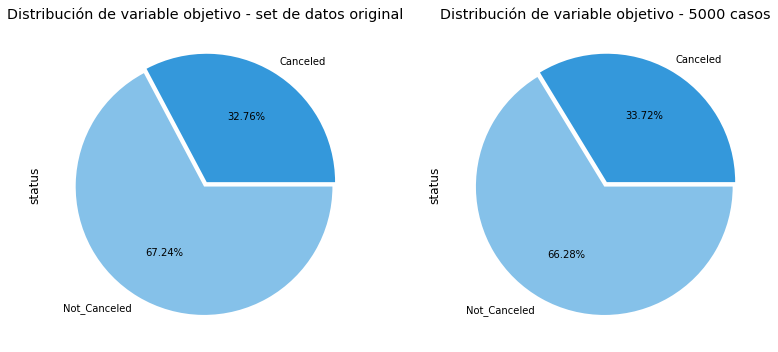

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

colors = ['#3498db', '#85c1e9']

ax1 = df.groupby(['booking_status']).count().plot(kind='pie', y='status', autopct='%.02f%%', explode=(0.02, 0.02), ax=axes[0], colors= colors)
ax1.get_legend().remove()
ax1.set_title('Distribución de variable objetivo - set de datos original')

ax2 = df_sample.groupby(['booking_status']).count().plot(kind='pie', y='status', autopct='%.02f%%', explode=(0.02, 0.02), ax=axes[1], colors= colors)
ax2.get_legend().remove()
ax2.set_title('Distribución de variable objetivo - 5000 casos')

plt.tight_layout()

plt.show()

# EDA

Visualizamos distribuciones de variables categoricas

In [26]:
df_sample = df_sample.drop(columns=['Booking_ID'])

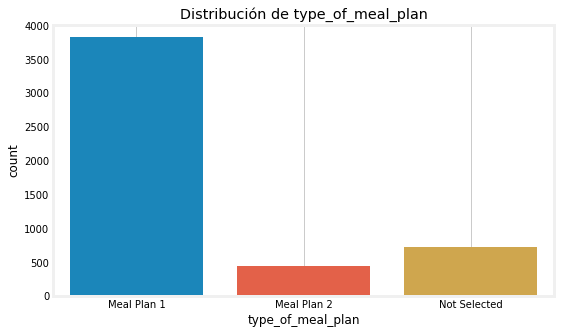

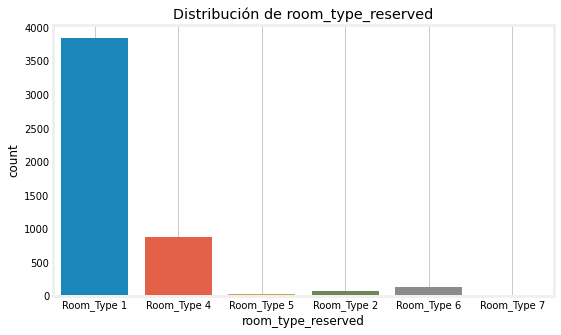

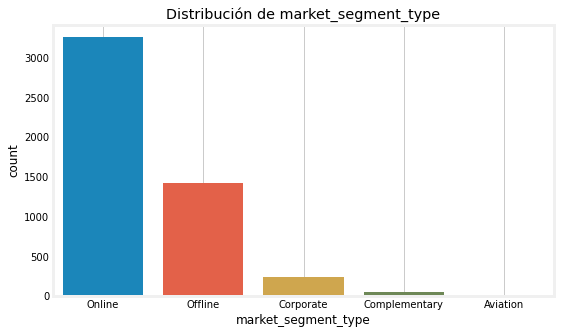

In [30]:
cat_cols = list(df_sample.select_dtypes(include='O').iloc[:,:3].columns)

for col in cat_cols:
    plt.figure(figsize=(8,5))
    ax = plt.axes()
    sns.countplot(data=df_sample,x=col)
    plt.grid(b=None)
    ax.set_facecolor('white')
    plt.title(f'Distribución de {col}')
    plt.show()

Notamos que hay algunas categorías con pocos valores, por lo que podrían agruparse

In [35]:
df_sample['room_type_reserved']=[x if x in ['Room_Type 1','Room_Type 4'] else 'other' for x in df_sample.room_type_reserved]

In [36]:
df_sample['type_of_meal_plan']=[x if x in ['Meal Plan 1','Not Selected'] else 'other' for x in df_sample.type_of_meal_plan]

In [37]:
df_sample['market_segment_type']=[x if x in ['Offline','Online'] else 'other' for x in df_sample.market_segment_type]

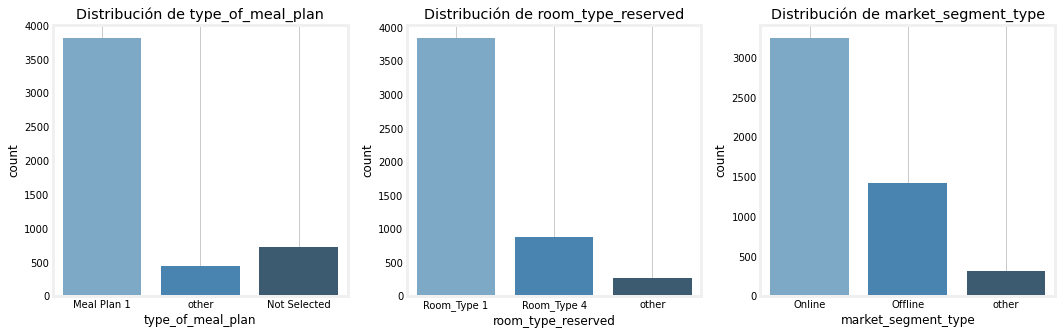

In [38]:
cat_cols = list(df_sample.select_dtypes(include='O').iloc[:,:3].columns)

fig, axes = plt.subplots(ncols=len(cat_cols), figsize=(16,5))

for i, col in enumerate(cat_cols):
    sns.countplot(data=df_sample, x=col, ax=axes[i], palette = 'Blues_d')
    axes[i].grid(b=None)
    axes[i].set_facecolor('white')
    axes[i].set_title(f'Distribución de {col}')

plt.show()